https://projecteuler.net/problem=675

In [11]:
class p675_v1():
    def __init__(self):
        pass

    def w(self, n):
        result = 0
        if n % 2 == 0:
            result += 1
            while n % 2 == 0:
                n = n // 2
        div = 3
        while div < n**0.5+1:
            if n % div == 0:
                result += 1
                while n % div == 0:
                    n = n // div
            div += 2
        if n > 1:
            result += 1
        return result

    def s(self, n):
        total = 0
        for i in range(1, int((n-1)**0.5)+1):
            if n % i == 0:
                total += 2**self.w(i)
                total += 2**self.w(n // i)
        if (i+1) ** 2 == n:
            total += 2**self.w(i+1)
        return total

    def f(self, n):
        total = 0
        fact = 1
        for i in range(2, n+1):
            fact *= i
            total += self.s(fact)
        return total

In [12]:
import time

for i in range(1, 19):
    s = time.time()
    p675_v1().f(i)
    e = time.time()
    print(i, e - s)

1 6.4373016357421875e-06
2 2.4318695068359375e-05
3 2.6941299438476562e-05
4 3.457069396972656e-05
5 7.700920104980469e-05
6 0.00017142295837402344
7 0.00037860870361328125
8 0.00069427490234375
9 0.0014088153839111328
10 0.002290487289428711
11 0.0029413700103759766
12 0.006676673889160156
13 0.020140409469604492
14 0.068115234375
15 0.24816465377807617
16 0.7982006072998047
17 3.081017255783081
18 12.74492073059082


In [13]:
class p675_v2():
    def __init__(self):
        self.prime_factor = []
        self.prime_amount = []
        self.limit = 0

    def update_prime_factor(self, n):
        if n % 2 == 0:
            if self.limit == 0:
                self.prime_factor.append(2)
                self.prime_amount.append(0)
                self.limit = 2
            while n % 2 == 0:
                n = n // 2
                self.prime_amount[0] += 1
        div = 3
        idx = 1
        while div**2 <= n:
            if n % div == 0:
                if div > self.limit:
                    self.prime_factor.append(div)
                    self.prime_amount.append(0)
                    self.limit = div
                while n % div == 0:
                    n = n // div
                    self.prime_amount[idx] += 1
                idx += 1
            div += 2
        if n > 1:
            if n > self.limit:
                self.prime_factor.append(n)
                self.prime_amount.append(1)
                self.limit = n
            else:
                idx = self.prime_factor.index(n)
                self.prime_amount[idx] += 1

    def get_div_amount(self):
        div_amount = 1
        for i in self.prime_amount:
            div_amount *= i+1
        return div_amount

    def s(self, n):
        self.update_prime_factor(n)
        length = len(self.prime_factor)
        amount = [0] * length
        cursor = 0
        unique_prime = 0
        div_limit = self.get_div_amount()
        current_div = 0
        total = 1
        #print(self.prime_factor, self.prime_amount)
        while current_div < div_limit - 1:
            amount[cursor] += 1
            unique_prime += (amount[cursor] == 1)
            if amount[cursor] > self.prime_amount[cursor]:
                while amount[cursor] > self.prime_amount[cursor]:
                    amount[cursor] = 0
                    unique_prime -= 1
                    cursor += 1
                    amount[cursor] += 1
                    unique_prime += (amount[cursor] == 1)
                cursor = 0
            total += 2 ** unique_prime
            current_div += 1
            #print(current_div, unique_prime, amount, total)
        #print()
        return total
    
    def f(self, n):
        self.prime_factor = []
        self.prime_amount = []
        self.limit = 0
        total = 0
        for i in range(2, n+1):
            total += self.s(i)
        return total

In [14]:
import time

for i in range(1, 21):
    s = time.time()
    p675_v2().f(i)
    e = time.time()
    print(i, e - s)

1 8.821487426757812e-06
2 1.52587890625e-05
3 1.1920928955078125e-05
4 1.8358230590820312e-05
5 2.8133392333984375e-05
6 4.935264587402344e-05
7 9.751319885253906e-05
8 0.00019216537475585938
9 0.0002453327178955078
10 0.0004715919494628906
11 0.0008668899536132812
12 0.001466989517211914
13 0.002496004104614258
14 0.003720998764038086
15 0.0064847469329833984
16 0.010790109634399414
17 0.017032146453857422
18 0.024765491485595703
19 0.04514336585998535
20 0.06401610374450684


In [15]:
class p675_v3():
    def __init__(self):
        self.prime_factor = []
        self.prime_amount = []
        self.limit = 0
        self.results = []
        self.amount = []
    
    def is_prime(self, n):
        for div in range(3, int(n**0.5)+1, 2):
            if n%div == 0:
                return 0
        return 1
    
    def check(self, n):
        self.amount = [0]
        save_n = n
        while n >= 2:
            self.amount[-1] += n // 2
            n //= 2
        n = save_n
        div = 3
        while div <= n:
            if self.is_prime(div) == 1:
                self.amount.append(0)
                save_n = n
                while n >= div:
                    self.amount[-1] += n // div
                    n //= div
                n = save_n
            div += 2
        return self.amount
    
    def print_prime(self):
        res = ""
        for prime, amount in zip(self.prime_factor, self.prime_amount):
            for i in range(amount):
                res += "*"+str(prime)
        return res[1:]
    
    def update_prime_factor(self, n):
        if n % 2 == 0:
            if self.limit == 0:
                self.prime_factor.append(2)
                self.prime_amount.append(0)
                self.limit = 2
            while n % 2 == 0:
                n = n // 2
                self.prime_amount[0] += 1
        div = 3
        while div**2 <= n:
            if n % div == 0:
                if div > self.limit:
                    self.prime_factor.append(div)
                    self.prime_amount.append(0)
                    self.limit = div
                while n % div == 0:
                    n = n // div
                    self.prime_amount[self.prime_factor.index(div)] += 1
            div += 2
        if n > 1:
            if n > self.limit:
                self.prime_factor.append(n)
                self.prime_amount.append(1)
                self.limit = n
            else:
                self.prime_amount[self.prime_factor.index(n)] += 1

    def s(self, n):
        self.update_prime_factor(n)
        length = len(self.prime_factor)
        total = 1
        picker = [0] * length
        cursor = 0
        mult = 1
        unique = 0
        while 1:
            picker[0] += 1
            unique += 1
            if picker[0] == 2:
                while picker[cursor] == 2:
                    picker[cursor] = 0
                    mult //= self.prime_amount[cursor]
                    unique -= 1
                    cursor += 1
                    if cursor == length:
                        return total
                    picker[cursor] += 1
                mult *= self.prime_amount[cursor]
                cursor = 0
            else:
                mult *= self.prime_amount[0]
            total += 2**unique * mult
            #print(total, unique, mult, picker)
        return total
    
    def f(self, n):
        self.prime_factor = []
        self.prime_amount = []
        self.limit = 0
        self.results = []
        self.amount = []
        total = 0
        for i in range(2, n+1):
            #print("->", i)
            total += self.s(i)
        return total

In [16]:
import time

for i in range(2, 21):
    s = time.time()
    p675_v3().f(i)
    e = time.time()
    print(i, e - s)

2 1.621246337890625e-05
3 1.3113021850585938e-05
4 1.4543533325195312e-05
5 2.0742416381835938e-05
6 4.482269287109375e-05
7 5.936622619628906e-05
8 5.793571472167969e-05
9 0.00010657310485839844
10 0.0001289844512939453
11 0.0001266002655029297
12 0.00015306472778320312
13 0.00020956993103027344
14 0.0003147125244140625
15 0.0003230571746826172
16 0.00046563148498535156
17 0.0005860328674316406
18 0.0006887912750244141
19 0.0008857250213623047
20 0.0010225772857666016


In [23]:
import matplotlib.pyplot as plt
import math
import time

def draw_single(x_start, x_end, y_end, x, all_y, colors):
    plt.axis([x_start, x_end, 0, y_end])
    for idx, y in enumerate(all_y):
        plt.scatter(x[:len(y)], y, color=colors[idx%len(colors)], s=1)
    plt.draw()
    plt.show()

def make_plot(x_start, x_end, timelimit, function_list, val_amount=1000, ko_time_average=1, ko_limit=1, 
              path_to_save=None, colors=["red", "green", "blue", "orange", "grey", "purple", "black", "pink"]):
    distance = x_end - x_start
    step = max(distance / val_amount, 1)
    query = x_start
    realquery = query
    x = []
    all_y = []
    while query <= x_end:
        x.append(realquery)
        query += step
        realquery = int(query)
    length = len(x)
    x_end = 0
    
    for v, func in enumerate(function_list):
        y = []
        time_got = 0
        time_average = [0] * ko_time_average
        ko_amount = 0
        cpt = 0
        print("\n", str(v+1))
        while cpt < length and sum(time_average)/ko_time_average < timelimit and ko_amount < ko_limit:
            query = x[cpt]
            time_start = time.time()
            res = func(query)
            time_got = time.time() - time_start
            print(query, time_got, res)
            y.append(time_got)
            
            if time_got > timelimit and time_average[cpt%ko_time_average] < timelimit:
                ko_amount += 1
            if time_got < timelimit and time_average[cpt%ko_time_average] > timelimit:
                ko_amount -= 1
            time_average[cpt%ko_time_average] = time_got
            cpt += 1
        all_y.append(y)
        
        if x_end < x[cpt-1]:
            x_end = x[cpt-1]
    print(x, all_y)
    draw_single(x_start, x_end, timelimit, x, all_y, colors)


 1
2 9.5367431640625e-06 3
3 1.1682510375976562e-05 12
4 1.52587890625e-05 33
5 4.839897155761719e-05 96
6 6.628036499023438e-05 231
7 0.0001468658447265625 636
8 0.00028705596923828125 1311
9 0.0006105899810791016 2526
10 0.0011277198791503906 4821
11 0.0025107860565185547 11706
12 0.005586147308349609 22101
13 0.017356157302856445 53286
14 0.05850338935852051 110211
15 0.18349003791809082 204396
16 0.6750845909118652 331341
17 2.6497836112976074 712176
18 10.947668075561523 1242321
19 46.84075713157654 2832756
20 253.43003702163696 5125461

 2
2 3.7670135498046875e-05 3
3 1.6689300537109375e-05 12
4 1.6927719116210938e-05 33
5 2.8371810913085938e-05 96
6 8.320808410644531e-05 231
7 7.510185241699219e-05 636
8 0.00012421607971191406 1311
9 0.00020551681518554688 2526
10 0.0004527568817138672 4821
11 0.0006806850433349609 11706
12 0.0012438297271728516 22101
13 0.0020265579223632812 53286
14 0.003522634506225586 110211
15 0.0064008235931396484 204396
16 0.008640766143798828 331341
17 

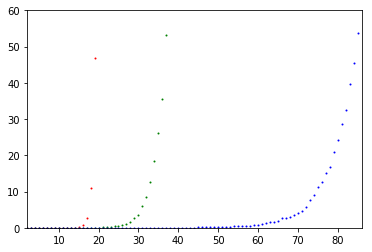

In [24]:
v1 = p675_v1().f
v2 = p675_v2().f
v3 = p675_v3().f
make_plot(2, 1000, 60, [v1, v2, v3])